# This notebook plots magnitude histogram for magnitudes and colours of mock catalogues.

In [46]:
import numpy as np
from astropy.io import fits
import os
import sys
sys.path.append('../plotting/')
import plots_zy as plot

# Load the real KV450 north catalogue

In [47]:
KV450_path = os.path.expanduser('~')+'/DATA/mocks/KV450/KiDS_VIKING/KV450_north_cut.cat'
KV450_file = fits.open(KV450_path, mode="update")
filters = ['u', 'g', 'r', 'i', 'z', 'y']
colors = ['u-g', 'g-r', 'r-i', 'i-z', 'z-y']

filters_names_kv450 = {'u':'u', 'g':'g', 'r':'r', 'i':'i', 'z':'Z', 'y':'Y'}
magerr_kv450 = {}
mag_kv450 = {}

for filter in filters:
    magerr_kv450['magerr_'+filter] = KV450_file[1].data['MAGERR_GAAP_'+filters_names_kv450[filter]]
    mag_kv450['mag_'+filter] = KV450_file[1].data['MAG_GAAP_'+filters_names_kv450[filter]]

color_kv450 = {}
for color in colors:
    f1 = color.split('-')[0]
    f2 = color.split('-')[1]

    color_kv450[color] = mag_kv450['mag_'+f1] - mag_kv450['mag_'+f2] 
    
    ind1 = np.logical_and(mag_kv450['mag_'+f1]>-99, mag_kv450['mag_'+f1]<99)
    ind2 = np.logical_and(mag_kv450['mag_'+f2]>-99, mag_kv450['mag_'+f2]<99)
    ind = ~(ind1 * ind2)
    color_kv450[color][ind] = -99
#randind = np.random.randint(0, zb.size, 10000)
#KV450_file[1].data = KV450_file[1].data[randind]
#KV450_file.writeto(os.path.expanduser('~')+'/DATA/mocks/KV450/KiDS_VIKING/KV450_north_cut.cat', overwrite=True)

## Load the DC2 mock KV450 lensing catalogue

In [51]:
survey = 'lsst'

DC2_path = '/net/home/fohlen13/yanza21/DATA/mocks/cosmoDC2/KV450_mock_lensing/DC2_KV450.fits'
DC2_file = fits.open(DC2_path, mode="update")

filters = ['u', 'g', 'r', 'i', 'z', 'y']
mag_columns={'u':'mag_u_'+survey+'_obs',
            'g':'mag_g_'+survey+'_obs',
            'r':'mag_r_'+survey+'_obs',
            'i':'mag_i_'+survey+'_obs',
            'z':'mag_z_'+survey+'_obs',
            'y':'mag_y_lsst_obs',}


magerr_columns={'u':'mag_u_'+survey+'_obserr',
            'g':'mag_g_'+survey+'_obserr',
            'r':'mag_r_'+survey+'_obserr',
            'i':'mag_i_'+survey+'_obserr',
            'z':'mag_z_'+survey+'_obserr',
            'y':'mag_y_lsst_obserr',}

magerr_dc2 = {}
mag_dc2 = {}

for filter in filters:
    magerr_dc2['magerr_'+filter] = DC2_file[1].data[magerr_columns[filter]]
    mag_dc2['mag_'+filter] = DC2_file[1].data[mag_columns[filter]]
    
import matplotlib.pyplot as plt

color_dc2 = {}
for color in colors:
    f1 = color.split('-')[0]
    f2 = color.split('-')[1]
    color_dc2[color] = mag_dc2['mag_'+f1] - mag_dc2['mag_'+f2]
    ind1 = np.logical_and(mag_dc2['mag_'+f1]>-99, mag_dc2['mag_'+f1]<99)
    ind2 = np.logical_and(mag_dc2['mag_'+f2]>-99, mag_dc2['mag_'+f2]<99)
    ind = ~(ind1 * ind2)
    color_dc2[color][ind] = -99

## Load the MICE2 mock KV450 catalogue

In [53]:
#DC2_path = os.path.expanduser('~')+'/DATA/mocks/cosmoDC2/KV450_magnification_off_noevo/DC2_KV450.fits'
MICE2_path = os.path.expanduser('~')+'/DATA/mocks/MICE2_KV450_cut/KV450_magnification_on/MICE2_KV450.fits'
MICE2_file = fits.open(MICE2_path, mode="update")

filters = ['u', 'g', 'r', 'i', 'z', 'y']
mag_columns={'u':'sdss_u_obs_mag',
            'g':'sdss_g_obs_mag',
            'r':'sdss_r_obs_mag',
            'i':'sdss_i_obs_mag',
            'z':'sdss_z_obs_mag',
            'y':'des_asahi_full_y_obs_mag',}


magerr_columns={'u':'sdss_u_obserr_mag',
            'g':'sdss_g_obserr_mag',
            'r':'sdss_r_obserr_mag',
            'i':'sdss_i_obserr_mag',
            'z':'sdss_z_obserr_mag',
            'y':'des_asahi_full_y_obserr_mag',}

magerr_mice2 = {}
mag_mice2 = {}

for filter in filters:
    magerr_mice2['magerr_'+filter] = MICE2_file[1].data[magerr_columns[filter]]
    mag_mice2['mag_'+filter] = MICE2_file[1].data[mag_columns[filter]]
    
color_mice2 = {}
for color in colors:
    f1 = color.split('-')[0]
    f2 = color.split('-')[1]
    color_mice2[color] = mag_mice2['mag_'+f1] - mag_mice2['mag_'+f2]
    ind1 = np.logical_and(mag_mice2['mag_'+f1]>-99, mag_mice2['mag_'+f1]<99)
    ind2 = np.logical_and(mag_mice2['mag_'+f2]>-99, mag_mice2['mag_'+f2]<99)
    ind = ~(ind1 * ind2)
    color_mice2[color][ind] = -99

## Plot mag-magerr for each filter

../plotting/plots_zy.py:30: RuntimeWarning: invalid value encountered in true_divide
  stat_mean = stat_sum/norm
../plotting/plots_zy.py:30: RuntimeWarning: invalid value encountered in true_divide
  stat_mean = stat_sum/norm
../plotting/plots_zy.py:30: RuntimeWarning: invalid value encountered in true_divide
  stat_mean = stat_sum/norm
../plotting/plots_zy.py:30: RuntimeWarning: invalid value encountered in true_divide
  stat_mean = stat_sum/norm
../plotting/plots_zy.py:30: RuntimeWarning: invalid value encountered in true_divide
  stat_mean = stat_sum/norm
../plotting/plots_zy.py:30: RuntimeWarning: invalid value encountered in true_divide
  stat_mean = stat_sum/norm


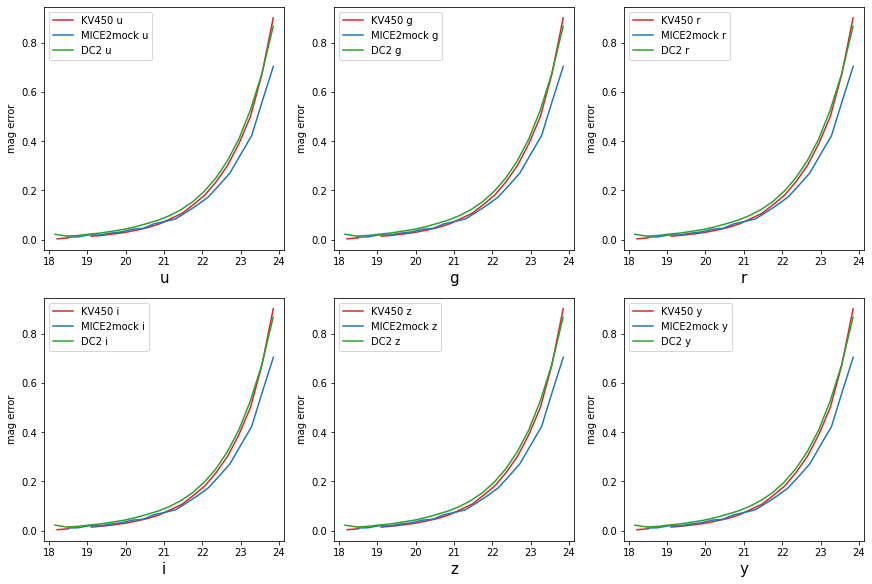

In [54]:
fig, axes_ = plt.subplots(ncols=3, nrows=2, figsize=(12, 8), constrained_layout=True)
axes = axes_.reshape(-1)

for i, f in enumerate(filters):
    inds_mice2 = np.logical_and(mag_mice2['mag_'+filter]<24, mag_mice2['mag_'+filter]>-99)
    inds_dc2 = np.logical_and(mag_dc2['mag_'+filter]<24, mag_dc2['mag_'+filter]>-99)
    inds_kv450 = np.logical_and(mag_kv450['mag_'+filter]<24, mag_kv450['mag_'+filter]>-99)
    plot.binned_mean_plot(mag_kv450['mag_'+filter][inds_kv450], 
                       magerr_kv450['magerr_'+filter][inds_kv450], bins=20, label='KV450 '+str(f),
                      color='C3', ax=axes[i])
    plot.binned_mean_plot(mag_mice2['mag_'+filter][inds_mice2],
                       magerr_mice2['magerr_'+filter][inds_mice2], bins=20, label='MICE2mock '+str(f),
                      color='C0', ax=axes[i])
    plot.binned_mean_plot(mag_dc2['mag_'+filter][inds_dc2], 
                       magerr_dc2['magerr_'+filter][inds_dc2], bins=20, label='DC2 '+str(f),
                      color='C2', ax=axes[i])

    axes[i].set_xlabel(f, fontsize=15)
    axes[i].set_ylabel('mag error')
    axes[i].legend()

## plot magnitude histogram

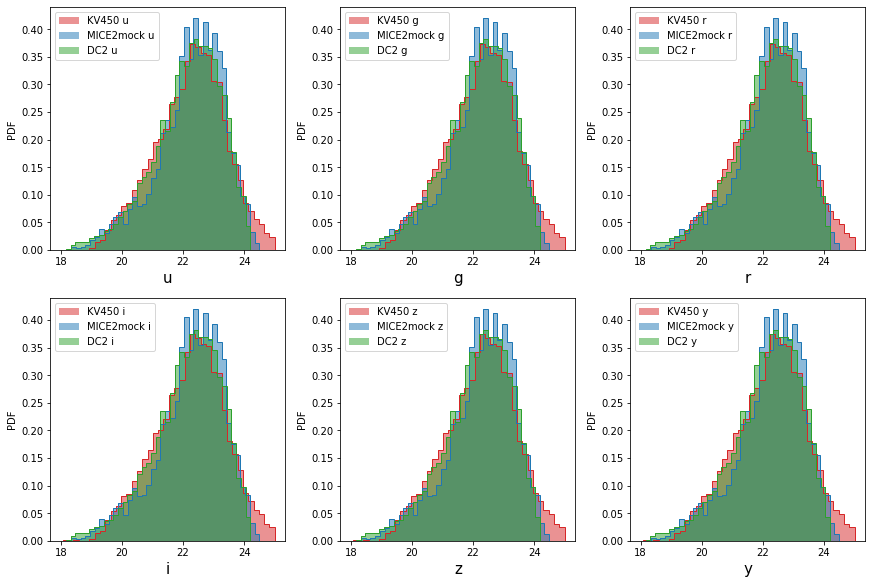

In [44]:

fig, axes_ = plt.subplots(ncols=3, nrows=2, figsize=(12, 8), constrained_layout=True)
axes = axes_.reshape(-1)

for i, f in enumerate(filters):
    inds_mice2 = np.logical_and(mag_mice2['mag_'+filter]<25, mag_mice2['mag_'+filter]>-99)
    inds_dc2 = np.logical_and(mag_dc2['mag_'+filter]<25, mag_dc2['mag_'+filter]>18)
    inds_kv450 = np.logical_and(mag_kv450['mag_'+filter]<25, mag_kv450['mag_'+filter]>-99)
    plot.hist_plot(mag_kv450['mag_'+filter][inds_kv450], bins=40,
                       ax=axes[i], label='KV450 '+str(f),
                       color='C3')
    plot.hist_plot(mag_mice2['mag_'+filter][inds_mice2], bins=40,
                       ax=axes[i],label='MICE2mock '+str(f),
                      color='C0')
    plot.hist_plot(mag_dc2['mag_'+filter][inds_dc2], bins=40,
                      ax=axes[i], label='DC2 '+str(f),
                     color='C2')

    axes[i].set_xlabel(f, fontsize=15)
    axes[i].set_ylabel('PDF')
    axes[i].legend()

## plot colour histogram

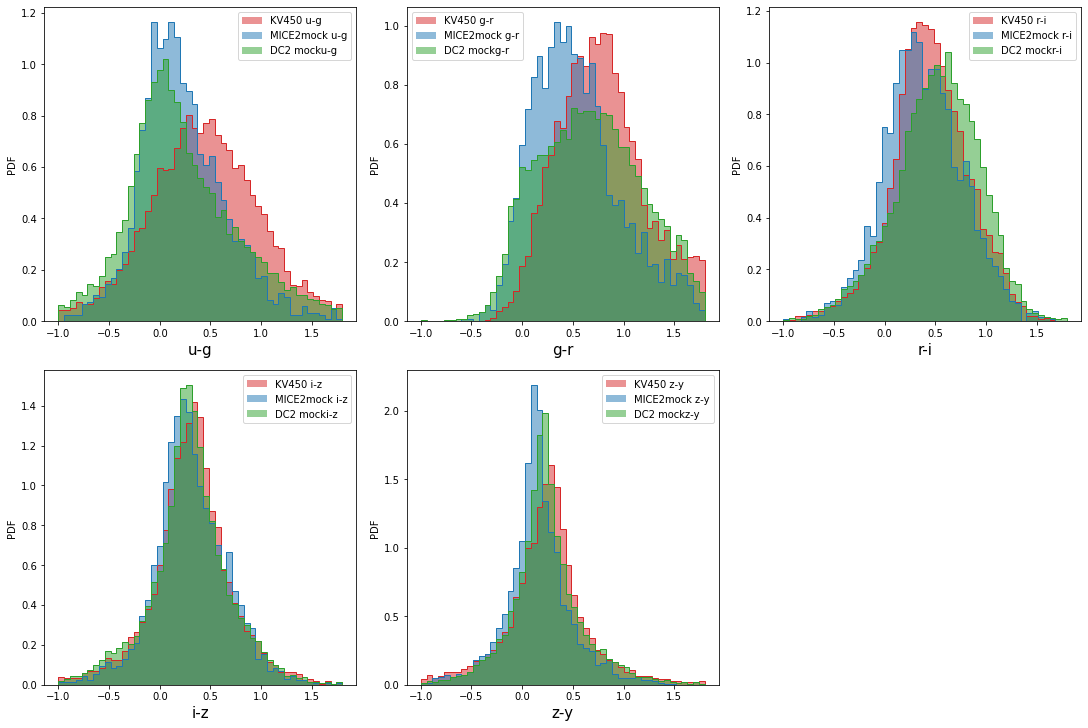

In [56]:
fig, axes_ = plt.subplots(ncols=3, nrows=2, figsize=(15, 10), constrained_layout=True)
axes = axes_.reshape(-1)

for i, f in enumerate(colors):
    
    inds_mice2 = (color_mice2[f] !=-99)
    inds_dc2 = (color_dc2[f] !=-99)
    inds_kv450 = (color_kv450[f] !=-99)
    plot.hist_plot(color_kv450[f][inds_kv450], 
                       ax=axes[i], label='KV450 '+str(f),
                      color='C3',bins=np.linspace(-1, 1.8))
    plot.hist_plot(color_mice2[f][inds_mice2], 
                       ax=axes[i], label='MICE2mock '+str(f),
                      color='C0',bins=np.linspace(-1, 1.8))
    plot.hist_plot(color_dc2[f][inds_dc2],
                       ax=axes[i], label='DC2 mock'+str(f),
                      color='C2',bins=np.linspace(-1, 1.8))

    axes[i].set_xlabel(f, fontsize=15)
    axes[i].set_ylabel('PDF')
    axes[i].legend()
    
axes[-1].set_visible(False)